# Time series forecasting, part one of three

The idea behind time series forecasting is that time series consisting of obseravtions that have already happened include information that help predicting observattions in the future. Forecasting method to be used depends on the form of systematic variation there exists in the time series. 

Models of exponential smoothing (simple, double and triple) are commonly used in business when forecasting demand. These models are rather simple to use, quickly calculated and easy to update if new observations become available.

When using exponential smoothing methods, there are three main alternatives:

- **Simple exponential smoothing** for time series with no trend nor seasonal variation.
- Double exponential smoothing, i.e., **Holt** method for time series with a trend but no seasonal variation.
- Triple exponential smoothing, i.e., **Holt-Winter** method for time series with a trend and seasonal variation.

## Simple exponential smoothing

In this note we consider simple exponential smoothing. It is applied when there is no noticeable trend nor seasonal variation in the time series. Note also that in such cases we do not have very ambitious aims in forecasting: only the next value is predicted. If farther than next time label is predicted, simple exponential smoothing gives the same predicted value for each these values.

In simple exponential smoothing the forecasted value is calculated as

$$ \alpha \cdot previous\ observation + (1-\alpha) \cdot previous\ forecast $$

So, the forecast is obtained as a weighted sum of the latest observation and the associated forecast. The weighting coefficient $\alpha$ is a number between 0 and 1. It expresses how much weight the latest observation is given.

- If $\alpha$ equals to zero, the forecast equals to the previously forecasted value.
- If $\alpha$ equals to one, the forecast equals to the previous observation.
- Bigger values of $\alpha$ lead to forecasts which easily respond to changes in variation in the time series. In such cases latest observations possess bigger weught.
- Smaller values of $\alpha$ strongly smooth variation in the time series.

The value of $\alpha$ is usually chosen so that the mean of the squares of errors of predictions is as small as possible. 

The formula for the forecast can also be written as
$$previous\ forecast + \alpha \cdot (previous\ observation - previous\ forecast)$$

From this formula we see that the forecast is remedied after each observation using the correction term $\alpha \cdot error\ of\ previous\ forecast$. 

## Using Python in exponential smoothing

Functions for exponential smoothing can be found from the library called **statsmodel.tsa**. 

As it turns out, in this example simple exponential smoothing is not a good model as there is a noticeable trend and seasonal variation in the time series which the model ignores. 

In [1]:
### Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

### The following style is used. 

plt.style.use('seaborn-whitegrid')

### Studying the time series

In [2]:
### Open the data.

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/time_series.xlsx')

df.head()

,Quarter,Demand
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450


In [3]:
### Move time labels to be in the index.
### The function to_datetime converts time related strings into time labels that Python understands.
### The parameter format allows recognizing different representations as time labels.

df.index = pd.to_datetime(df['Quarter'], format = "%Y-%m-%d")

### Omit the obsolete column.

df = df.drop('Quarter', axis = 1)
df.head()

,Demand
Quarter,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450


<AxesSubplot:xlabel='Quarter'>

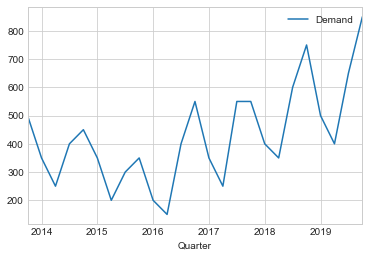

In [4]:
### Let's take a graphical view of the data.

df.plot()

### Fitting the model

The model that we have decided to use is fitted to the data (**fit()**). As a result an object is achieved. This object, named as **model** below, contains various informations about the model.

In the following the value **'Q''** is used for the parameter **freq**. This is because time information consists of quarter annual last dates. More information about possible values of the parameter **freq** can be found at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases.

In [5]:
### Fitting the exponential smoothing model into the object named model.

model = ExponentialSmoothing(df['Demand'], freq = 'Q').fit()

In [6]:
### The object called model gives us the simulated predictions according to the exponential smoothing model (fittedvalues).

df['Forecast'] = model.fittedvalues

df

,Demand,Forecast
Quarter,,
2013-12-31,500,388.106006
2014-03-31,350,424.219757
2014-06-30,250,400.265354
2014-09-30,400,351.767258
2014-12-31,450,367.334361
2015-03-31,350,394.014670
2015-06-30,200,379.808949
2015-09-30,300,321.775667
2015-12-31,350,314.747578


<AxesSubplot:xlabel='Quarter'>

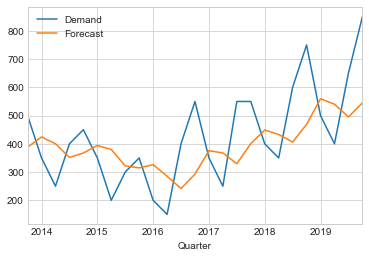

In [7]:
### Draw the original time series and the predictions by the exponential smoothing model in the same coordinate system.

df.plot()

In [8]:
### Errors of the prediction (residuals) are found in the the object named model.

df['Residual'] = model.resid

df

,Demand,Forecast,Residual
Quarter,,,
2013-12-31,500,388.106006,111.893994
2014-03-31,350,424.219757,-74.219757
2014-06-30,250,400.265354,-150.265354
2014-09-30,400,351.767258,48.232742
2014-12-31,450,367.334361,82.665639
2015-03-31,350,394.014670,-44.014670
2015-06-30,200,379.808949,-179.808949
2015-09-30,300,321.775667,-21.775667
2015-12-31,350,314.747578,35.252422


## Studying the model

How good an approximation is the model then? There are several ways to look at this question. Here we can use

- line chart of time series of errors of forecast
- scatter chart of forecasted and observed, realized values
- the model related statistics which can be viewed using the function **summary()**.

In particular, note the sum of squared errors **SSE**. The procedure behind the model is to minimize the SSE.

Text(0, 0.5, 'Error of prediction')

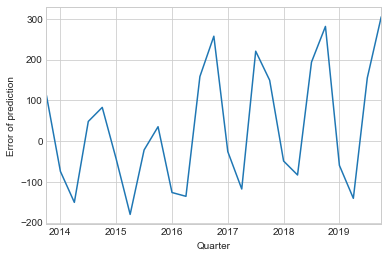

In [15]:
### Draw the errors of forecast as line chart.
### Ideally time series of errors of prediction is random.

df['Residual'].plot()
plt.ylabel('Error of prediction')

Text(0, 0.5, 'Realized demand')

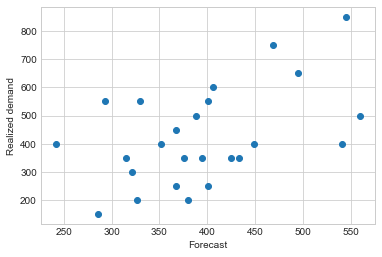

In [10]:
### Draw the scatter chart of the predicted and realized demands.
### The closer the dots follow a straight line from the lower left corner to the top right corner the better the prediction model is.

plt.scatter(x = df['Forecast'], y = df['Demand'])

plt.xlabel('Forecast')
plt.ylabel('Realized demand')

In [11]:
### Statistics for the model

model.summary()

Dep. Variable:,Demand,No. Observations:,25
Model:,ExponentialSmoothing,SSE,562690.236
Optimized:,True,AIC,254.540
Trend:,None,BIC,256.978
Seasonal:,None,AICC,256.540
Seasonal Periods:,None,Date:,"Wed, 20 Oct 2021"
Box-Cox:,False,Time:,21:38:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3227497,alpha,True
initial_level,388.10601,l.0,True


### Calculating forecasts

In order to determine time labels for the predictions

- The first time label of the forecasted occasions has to be the next time label after the time series.
- The number of the predicted occasions can be determined using the parameter **periods**.
- The frequency of the predicted occasions has to be the same as the value used for the parameter **freq** in fitting the model.

Further information of possible values for the parameter **freq** can be found at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases.

In [12]:
### Check the last time label of the time series.

df.tail()

,Demand,Forecast,Residual
Quarter,,,
2018-12-31,750,468.808572,281.191428
2019-03-31,500,559.563017,-59.563017
2019-06-30,400,540.339072,-140.339072
2019-09-30,650,495.044681,154.955319
2019-12-31,850,545.056461,304.943539


In [16]:
### Add time labels for the forecasted occasions.
### The first date is later than the last time label in the time series.

index = pd.date_range('2020-03-31', periods = 8, freq = 'Q')

### Predicted values for the following eight quarters.

forecasts = model.forecast(8)

### Add forecasts to the dataframe:

df_forecast = pd.DataFrame(data = forecasts, index = index, columns = ['Forecast'])

df_forecast

,Forecast
2020-03-31,643.476892
2020-06-30,643.476892
2020-09-30,643.476892
2020-12-31,643.476892
2021-03-31,643.476892
2021-06-30,643.476892
2021-09-30,643.476892
2021-12-31,643.476892


<AxesSubplot:xlabel='Quarter'>

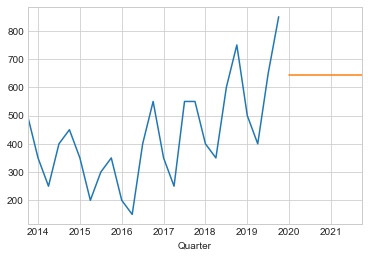

In [17]:
### Next add a line chart of the realized observations.

df['Demand'].plot()

### Add forecasted values to the same coordinate system.
### Here we see that simple exponential smoothing gives a prediction that is a constant (graphically straight line).

df_forecast['Forecast'].plot()

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>